In [7]:
from openvqe.vqe import VQE
import matplotlib.pyplot as plt
import numpy as np

# Variational Quantum Eigensolver (VQE) for H2 Molecule

This Jupyter Notebook demonstrates the use of the Variational Quantum Eigensolver (VQE) algorithm to find the ground state energy of the H4 molecule. The VQE algorithm is a hybrid quantum-classical algorithm that leverages the power of quantum computers to solve optimization problems.

## Fermionic Adaptive Derivative-Assembled Pseudo-Trotter Ansatz (Fermionic ADAPT-VQE)


**Structure Description**:  
Fermionic ADAPT-VQE is a quantum variational algorithm designed to optimize the ansatz for solving electronic structure problems more efficiently. Unlike fixed ansatz approaches like UCCSD, ADAPT-VQE constructs the wave function iteratively by **adapting the ansatz based on the system’s properties**. The ansatz starts from a reference state $ |\phi_0\rangle $ and builds up using **excitations from a predefined pool of fermionic operators**. The wave function is expressed as:  
$$
|\psi_{\text{ADAPT}}\rangle = e^{\theta_k \hat{A}_k} \cdots e^{\theta_2 \hat{A}_2} e^{\theta_1 \hat{A}_1} |\phi_0\rangle
$$
where $ \hat{A}_i $ are selected excitation operators, and $ \theta_i $ are variational parameters optimized using the **Variational Quantum Eigensolver (VQE)** framework.

The selection of operators is driven by the **gradient of the Hamiltonian with respect to each operator**, adding terms iteratively until convergence.

---

**Key Features**:
- **Adaptive Ansatz Construction**: The ansatz is constructed iteratively by adding operators one at a time, guided by the gradient, reducing unnecessary terms.
- **Fermionic Operator Pool**: Uses a pool of fermionic creation and annihilation operators tailored for electronic structure problems.
- **Efficient Parameterization**: By limiting the ansatz to the most impactful operators, the algorithm reduces circuit depth and parameter count.

---

**Advantages**:
- **Reduced Circuit Depth**: Only the most important operators are included, making it more resource-efficient than fixed ansatz approaches.
- **System-Specific Adaptation**: Customizes the ansatz to the problem at hand, potentially leading to better accuracy with fewer resources.
- **Scalable**: The adaptive nature allows scaling to larger systems by adding complexity incrementally.

---

**Limitations**:
- **Gradient Computation Overhead**: Requires computing the gradient with respect to each operator at every step, which can be computationally expensive.
- **Operator Pool Dependence**: The quality of the solution depends on the choice of the initial pool of operators; an inadequate pool can limit accuracy.
- **Optimization Challenges**: Like other VQE-based methods, it may suffer from barren plateaus or difficulty in finding global minima due to complex landscapes.

## Parameters

- **Molecule Symbol**: `H2`
- **Type of Generator**: `spin_complement_gsd`
- **Transformation**: `JW`
- **Active**: `False`

## Workflow

1. **Initialization**: Initialize the VQE algorithm with the specified parameters.
2. **Execution**: Execute the VQE algorithm to find the ground state energy.
3. **Results**: Plot the energy results and error results obtained from the VQE execution.


In [2]:
molecule_symbol = 'H2'
type_of_generator = 'spin_complement_gsd'
transform = 'JW'
algorithm = 'fermionic_adapt'

opts = {
        'n_max_grads': 1,
        'optimizer': 'COBYLA',
        'tolerance': 10**(-6),
        'type_conver': 'norm',
        'threshold_needed': 1e-2,
        'max_external_iterations': 35
    }


In [3]:
vqe_non_active = VQE.algorithm(algorithm, molecule_symbol, type_of_generator, transform, False, opts)
vqe_non_active.execute()

 --------------------------------------------------------------------------
Running in the non active case: 
molecule symbol: H2 
molecule basis: 6-31g 
type of generator: spin_complement_gsd 
transform: JW 
options: {'n_max_grads': 1, 'optimizer': 'COBYLA', 'tolerance': 1e-06, 'type_conver': 'norm', 'threshold_needed': 0.01, 'max_external_iterations': 35} 
 --------------------------------------------------------------------------
 --------------------------------------------------------------------------
                                                          
                      Generate Hamiltonians and Properties from :
                                                          
 --------------------------------------------------------------------------
                                                          
Number of electrons =  2
Number of qubits before active space selection =  8
Orbital energies =  [-0.59279976  0.23579258  0.77956294  1.39138474]
Nuclear repulsion =  0

/home/nathan/miniconda/envs/openvqe/lib/python3.11/site-packages/openvqe/common_files/molecule_factory_with_sparse.py:488: UserWarning: This guess_init_state function is deprecated.
  _, _, hf_init = get_cluster_ops_and_init_guess(
/home/nathan/miniconda/envs/openvqe/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


-1.12654503453569
 The reference energy of the molecular system is:  -1.12654503




 --------------------------------------------------------------------------
                     Fermionic_ADAPT-VQE iteration:  0
 --------------------------------------------------------------------------
 Check gradient list chronological order
 Norm of the gradients in current iteration =   1.17879903
 Max gradient in current iteration=   0.54656492
 Index of the Max gradient in current iteration=  38
sorted_index1:  [38]
 Finished energy iteration_i:      -1.132782600873
 -----------New ansatz created----------- 
    # 	Coefficients 	Term
    0 	-0.022808 	38

   Normal return from subroutine COBYLA

   NFVALS =   31   F =-1.132783E+00    MAXCV = 0.000000E+00
   X =-2.280821E-02




 --------------------------------------------------------------------------
                     Fermionic_ADAPT-VQE iteration:  1
 --------------------------------------------------------------------------
 Check grad

In [4]:
vqe_active = VQE.algorithm(algorithm, molecule_symbol, type_of_generator, transform, True, opts)
vqe_active.execute()

 --------------------------------------------------------------------------
Running in the active case: 
molecule symbol: H2 
molecule basis: 6-31g 
type of generator: spin_complement_gsd 
transform: JW 
options: {'n_max_grads': 1, 'optimizer': 'COBYLA', 'tolerance': 1e-06, 'type_conver': 'norm', 'threshold_needed': 0.01, 'max_external_iterations': 35} 
 --------------------------------------------------------------------------
 --------------------------------------------------------------------------
                                                          
                      Generate Hamiltonians and Properties from :
                                                          
 --------------------------------------------------------------------------
                                                          
Number of electrons =  2
Number of qubits before active space selection =  8
Orbital energies =  [-0.59279976  0.23579258  0.77956294  1.39138474]
Nuclear repulsion =  0.705

/home/nathan/miniconda/envs/openvqe/lib/python3.11/site-packages/openvqe/common_files/molecule_factory_with_sparse.py:488: UserWarning: This guess_init_state function is deprecated.
  _, _, hf_init = get_cluster_ops_and_init_guess(


-1.1264690464506755
 The reference energy of the molecular system is:  -1.12646905




 --------------------------------------------------------------------------
                     Fermionic_ADAPT-VQE iteration:  0
 --------------------------------------------------------------------------
 Check gradient list chronological order
 Norm of the gradients in current iteration =   1.22835733
 Max gradient in current iteration=   0.69539721
 Index of the Max gradient in current iteration=  23
sorted_index1:  [23]
 Finished energy iteration_i:      -1.146293586928
   Normal return from subroutine COBYLA

   NFVALS =   31   F =-1.146294E+00    MAXCV = 0.000000E+00
   X =-5.677046E-02

 -----------New ansatz created----------- 
    # 	Coefficients 	Term
    0 	-0.056770 	23




 --------------------------------------------------------------------------
                     Fermionic_ADAPT-VQE iteration:  1
 --------------------------------------------------------------------------
 Check gr

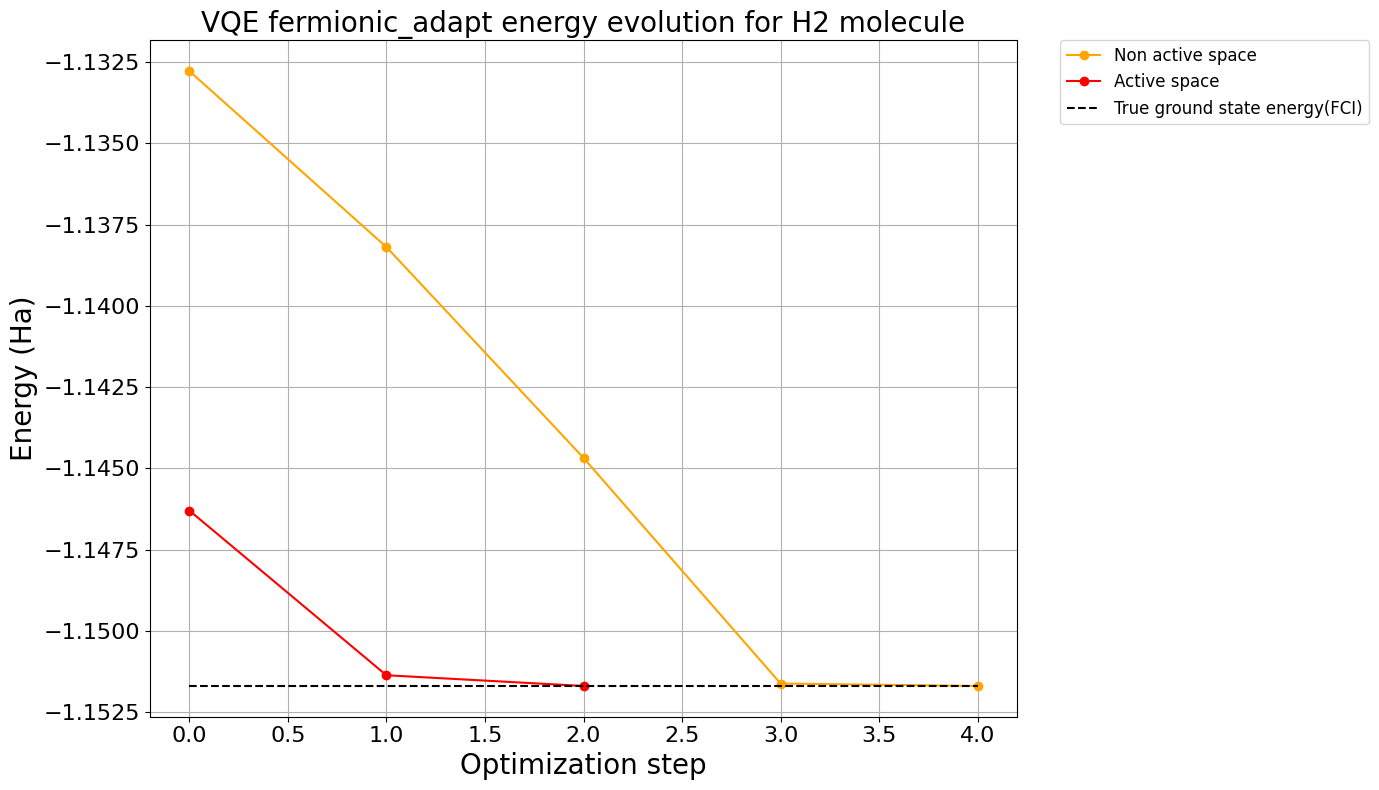

In [5]:

energies_1, energies_2 = vqe_non_active.iterations['energies'], vqe_active.iterations['energies']
# Plot results with custom styles
plt.figure(figsize=(14, 8))  # Larger plot size
plt.plot(
    energies_1,
    "-o",  # Line style with circle markers
    color="orange",  # Use custom color
    label=f"Non active space"
)
plt.plot(
    energies_2,
    "-o",  # Line style with circle markers
    color="red",  # Use custom color
    label=f"Active space"
)
plt.plot(
    [vqe_non_active.info['FCI']] * max([len(energies_1), len(energies_2)]), 
    "k--", 
    label="True ground state energy(FCI)"
)
plt.xlabel("Optimization step", fontsize=20)
plt.ylabel("Energy (Ha)", fontsize=20)

plt.xticks(fontsize=16)  # Set font size for x-axis tick labels
plt.yticks(fontsize=16) 

# Move the legend box outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=12)
plt.grid()
plt.title(f"VQE {algorithm} energy evolution for {molecule_symbol} molecule", fontsize=20)
plt.tight_layout()  # Adjust layout to prevent clipping

plt.show()

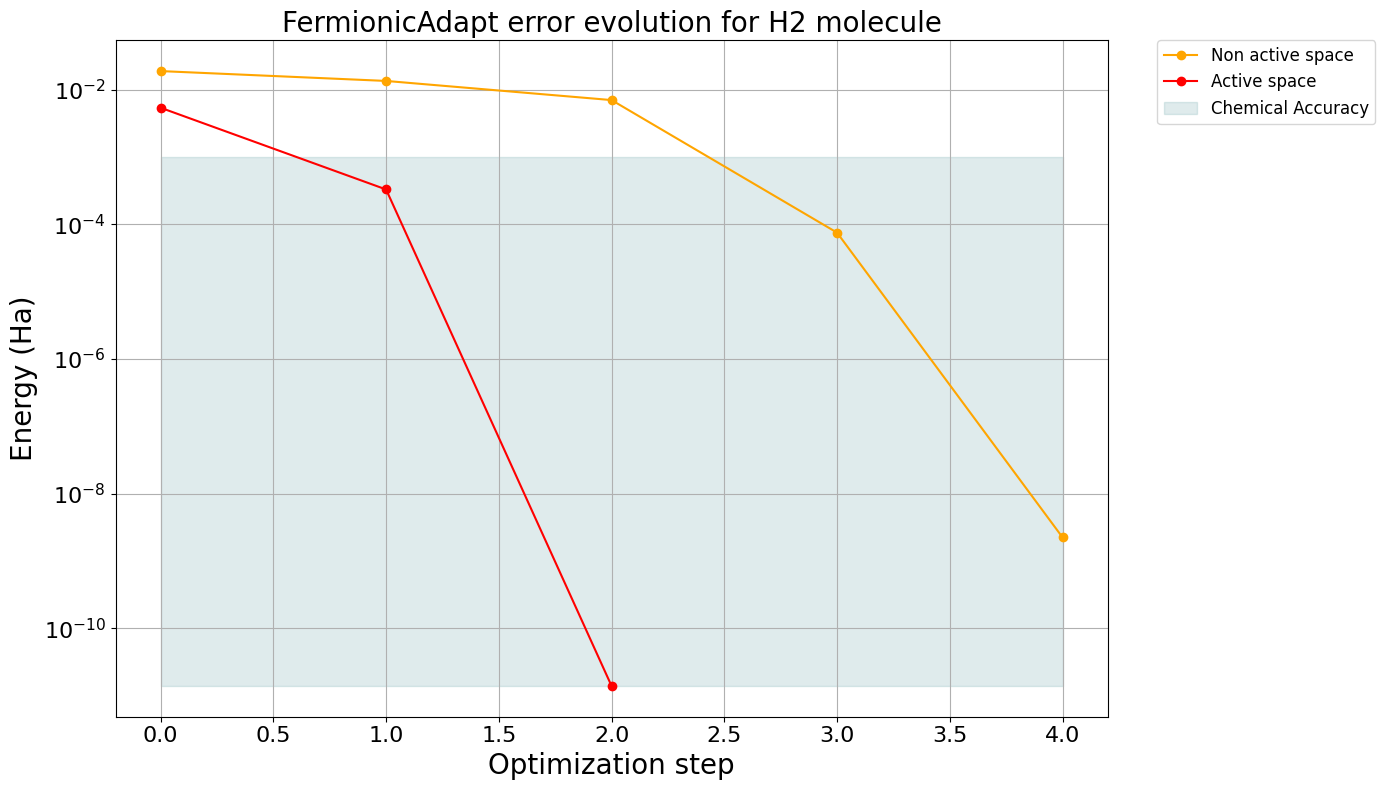

In [17]:
energies_1, energies_2 = vqe_non_active.iterations['energies'], vqe_active.iterations['energies']
err1 = np.maximum(energies_1 - vqe_non_active.info['FCI'], 1e-16)
err2 = np.maximum(energies_2 - vqe_non_active.info['FCI'], 1e-16)
# Plot results with custom styles
plt.figure(figsize=(14, 8))  # Larger plot size
plt.plot(
    err1,
    "-o",  # Line style with circle markers
    color="orange",  # Use custom color
    label=f"Non active space"
)
plt.plot(
    err2,
    "-o",  # Line style with circle markers
    color="red",  # Use custom color
    label=f"Active space"
)
plt.fill_between(
     np.arange(0, max([len(energies_1), len(energies_2)])), 
    min(min(err1), min(err2)), 
    1e-3, 
    color="cadetblue", 
    alpha=0.2, 
    interpolate=True, 
    label="Chemical Accuracy"
)
plt.yscale('log')
plt.xlabel("Optimization step", fontsize=20)
plt.ylabel("Energy (Ha)", fontsize=20)
plt.xticks(fontsize=16)  # Set font size for x-axis tick labels
plt.yticks(fontsize=16) 

# Move the legend box outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=12)
plt.grid()
plt.title(f"{type(vqe_non_active.algorithm).__name__} error evolution for {vqe_non_active.molecule_symbol} molecule", fontsize=20)
plt.tight_layout()  # Adjust layout to prevent clipping

plt.show()